# Classification Modeling to Predict Sexual Violence Severity


## Project Background

This project is to understand the relationship between various socio-demographic characteristics, past behavioral patterns, environmental factors and the likelihood of individuals being involved in sexual violence incidents. The goal is to build a predictive model capable of accurately assessing the risk of perpetrating sexual violence.

## Problem Statement

This research is conducted to understand the relationship between various socio-demographic characteristics, past behavioral patterns, environmental factors and the likelihood of individuals being involved in sexual violence incidents. The goal is to build a predictive model capable of accurately assessing the risk of perpetrating sexual violence.

## Aim

1. To identify significant factors contributing to sexual violence severity

2. Develop a predictive model integrating conflict characteristics, actor types, and other relevant factors to predict the incidence of sexual violence.

3. Evaluate the model's effectiveness using metrics such as precision and recall to provide valuable insight for policy making in order to reduce sexual violence incident rate.


## Method

Few standard steps and methods are introduced to run the machine learning model.
1. Dataset collection
2. Data preprocessing
3. Exploratory data analysis
4. Machine learning modeling
5. Model evaluation
6. Result interpretation

### Dataset Collection

For this project we considered the dataset obtained from:
1. www.sexualviolencedata.org.
2. https://wbl.worldbank.org (World Bank: Women, Business and the Law)
3. https://ilostat.ilo.org/data/ (World Bank, World Development Indicators database)
4. https://worldhappiness.report/archive/ (World Happiness Report)

To build a more effective prediction machine learning model, there are some factors that could be considered:
1. Cultural and social factors: social support, freedom to make life choices
2. Psychological and behavioural factors: happiness score
3. Institutional factors: legislation on sexual harassment
4. Environmental factors: GDP per capita, generosity, perceptions of corruption, female to male labour participation ratio


In [ ]:
import pandas as pd
import numpy as np

# Read the file with y-variable. Source of dataset: www.sexualviolencedata.org.

url_1 = 'https://github.com/liyi0428/machine_learning/raw/main/SVAC_3.2_complete.xlsx'
df_sexual_violence = pd.read_excel(url_1)

In [ ]:
## testing

sexual_violence_raw_data = pd.read_excel(url_1)
sexual_violence_grouped_df = sexual_violence_raw_data.groupby(['ISO_country_code','year']).agg({'state_prev': 'median','ai_prev': 'median','hrw_prev': 'median','child_prev': 'median'}).astype(int).reset_index()


In [ ]:
sexual_violence_grouped_df

,ISO_country_code,year,state_prev,ai_prev,hrw_prev,child_prev
0,AFG,1989,0,0,0,0
1,AFG,1990,0,0,0,0
2,AFG,1991,0,0,0,0
3,AFG,1992,0,0,0,0
4,AFG,1993,0,0,0,0
...,...,...,...,...,...,...
2009,ZWE,2002,0,0,0,0
2010,ZWE,2003,0,0,0,0
2011,ZWE,2004,0,0,0,0
2012,ZWE,2005,0,0,0,0


In [ ]:
## Select data columns used in prediction model

sexual_violence_df = sexual_violence_grouped_df.loc[:,['year','ISO_country_code','state_prev','ai_prev','hrw_prev','child_prev']].copy()

In [ ]:
def determine_new_value(row):
    if all(row == -99):
        return -99
    if any(row == 3):
        return 3
    if any(row == 2):
        return 2
    if any(row == 1):
        return 1
    return 0

columns_to_check = ['state_prev','ai_prev','hrw_prev','child_prev']

sexual_violence_df['consolidated_prev']  = sexual_violence_df[columns_to_check].apply(determine_new_value, axis=1)

In [ ]:
sexual_violence_df

,year,ISO_country_code,state_prev,ai_prev,hrw_prev,child_prev,consolidated_prev
0,1989,AFG,0,0,0,0,0
1,1990,AFG,0,0,0,0,0
2,1991,AFG,0,0,0,0,0
3,1992,AFG,0,0,0,0,0
4,1993,AFG,0,0,0,0,0
...,...,...,...,...,...,...,...
2009,2002,ZWE,0,0,0,0,0
2010,2003,ZWE,0,0,0,0,0
2011,2004,ZWE,0,0,0,0,0
2012,2005,ZWE,0,0,0,0,0


In [ ]:
sexual_violence_df.columns

Index(['year', 'ISO_country_code', 'state_prev', 'ai_prev', 'hrw_prev',
       'child_prev', 'consolidated_prev'],
      dtype='object')

In [ ]:
## Perform one hot encoding to differentiate different forms of prevalence found:

#sexual_violence_df['form'] = sexual_violence_df['form'].str.replace(' ','')
#sexual_violence_df['form'] = sexual_violence_df['form'].str.replace(',',' ')
#sexual_violence_df['form'] = sexual_violence_df['form'].str.replace('','99')
#sexual_violence_df['form'] = sexual_violence_df['form'].str.replace('-99','99')

#prevalence_form_mapping = {
 #   1: 'Rape',
 #   2: 'Sexual Slavery',
 #   3: 'Forced Prostitution',
  #  4: 'Forced Pregnancy',
  #  5: 'Forced Sterilization',
 #   6: 'Sexual Mutilation',
  #  7: 'Sexual Torture',
  #  -99: 'Data is unavailable'}

### Create a function to map prevalence form codes to corresponding prevalence events:
#unique_values = ' '.join(sexual_violence_df['form'].values.tolist()).split(' ')
#for number in unique_values:
#    sexual_violence_df[f'{number}'] = 0

#for idx, row in sexual_violence_df.iterrows():
#    for number in row['form'].split(' '):
#        sexual_violence_df.loc[idx, f'{number}'] = 1
#sexual_violence_df.drop('form', axis=1, inplace=True)


In [ ]:
sexual_violence_df.head()

,year,ISO_country_code,state_prev,ai_prev,hrw_prev,child_prev,consolidated_prev
0,1989,AFG,0,0,0,0,0
1,1990,AFG,0,0,0,0,0
2,1991,AFG,0,0,0,0,0
3,1992,AFG,0,0,0,0,0
4,1993,AFG,0,0,0,0,0


In [ ]:
# Read the file with x-variables. Source of dataset: https://wbl.worldbank.org (World Bank: Women, Business and the Law)
# The indicator measures whether there is a legal provision or legislation that specifically protects women against sexual harassment in employment, including unwelcome verbal or physical conduct of a sexual nature.

url_2 = 'https://github.com/liyi0428/machine_learning/raw/main/There%20is%20legislation%20on%20sexual%20harassment%20in%20employment%20(1=yes;%200=no).csv'
df_legislation_on_sexual_harassment = pd.read_csv(url_2)

In [ ]:
df_legislation_on_sexual_harassment.head()

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,Disaggregation
0,There is legislation on sexual harassment in e...,SG.LEG.SXHR.EM,Afghanistan,AFG,2023,1.0,NaN
1,There is legislation on sexual harassment in e...,SG.LEG.SXHR.EM,Afghanistan,AFG,2022,1.0,NaN
2,There is legislation on sexual harassment in e...,SG.LEG.SXHR.EM,Afghanistan,AFG,2021,1.0,NaN
3,There is legislation on sexual harassment in e...,SG.LEG.SXHR.EM,Afghanistan,AFG,2020,1.0,NaN
4,There is legislation on sexual harassment in e...,SG.LEG.SXHR.EM,Afghanistan,AFG,2019,1.0,NaN


In [ ]:
legislation_on_sexual_harassment_df = df_legislation_on_sexual_harassment.loc[:,['Country Code','Year','Value']].copy()
legislation_on_sexual_harassment_df.rename(columns = {'Country Code':'ISO_country_code','Year':'year','Value':'legislation_on_sexual_harassment'}, inplace = True)

In [ ]:
legislation_on_sexual_harassment_df.head()

,ISO_country_code,year,legislation_on_sexual_harassment
0,AFG,2023,1.0
1,AFG,2022,1.0
2,AFG,2021,1.0
3,AFG,2020,1.0
4,AFG,2019,1.0


In [ ]:
# Read the file with x-variables. Source of dataset: https://worldhappiness.report/archive/ (World Happiness Report)
# The indicator measures whether there is a legal provision or legislation that specifically protects women against sexual harassment in employment, including unwelcome verbal or physical conduct of a sexual nature.

url_3 = 'https://github.com/liyi0428/machine_learning/raw/main/official_happiness_report.xls'
df_happiness = pd.read_excel(url_3)

In [ ]:
df_happiness.head()

,Country name,ISO_country_code,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,AFG,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,AFG,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,AFG,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,AFG,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,AFG,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [ ]:
df_happiness.columns

Index(['Country name', 'ISO_country_code', 'year', 'Life Ladder',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [ ]:
happiness_df = df_happiness.loc[:,['ISO_country_code', 'year', 'Life Ladder',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption']].copy()
happiness_df.rename(columns = {'Life Ladder':'happiness_score',
                               'Log GDP per capita':'GDP_per_capita','Social support':'social_support',
                               'Healthy life expectancy at birth':'healthy_life_expectancy_at_birth','Freedom to make life choices':'freedom_to_make_life_choices',
                               'Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'}, inplace = True)

In [ ]:
happiness_df.head()

,ISO_country_code,year,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,AFG,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686
1,AFG,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035
2,AFG,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766
3,AFG,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109
4,AFG,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620


In [ ]:
# Read the file with x-variables. Source of dataset: https://ilostat.ilo.org/data/ (World Bank, World Development Indicators database)
# The indicator measures the proportion of the population ages 15 and older that is economically active: all people who supply labor for the production of goods and services during a specified period.
# Ratio of female to male labor force participation rate is calculated by dividing female labor force participation rate by male labor force participation rate and multiplying by 100.
url_4 = 'https://github.com/liyi0428/machine_learning/raw/main/labour_participant_report.csv'
df_gender_labour_participation = pd.read_csv(url_4)

In [ ]:
df_gender_labour_participation

,Unnamed: 0,Country Name,Country Code,year,female_to_male_labour_participation_ratio
0,434,Afghanistan,AFG,1991,19.677310
1,435,Albania,ALB,1991,70.819226
2,436,Algeria,DZA,1991,14.440528
3,439,Angola,AGO,1991,94.977416
4,441,Argentina,ARG,1991,62.491935
...,...,...,...,...,...
3732,4768,Viet Nam,VNM,2023,88.027816
3733,4769,Virgin Islands (U.S.),VIR,2023,68.127935
3734,4771,"Yemen, Rep.",YEM,2023,8.444503
3735,4772,Zambia,ZMB,2023,77.452844


In [ ]:
gender_labour_participation_df = df_gender_labour_participation.loc[:,['Country Code','year','female_to_male_labour_participation_ratio' ]].copy()
gender_labour_participation_df.rename(columns = {'Country Code':'ISO_country_code'}, inplace = True)

In [ ]:
dataset_template = pd.merge(pd.merge(pd.merge(sexual_violence_df, legislation_on_sexual_harassment_df,on=['ISO_country_code','year']),happiness_df,on=['ISO_country_code','year']),gender_labour_participation_df,on=['ISO_country_code','year']).drop_duplicates()

In [ ]:
dataset_template

,year,ISO_country_code,state_prev,ai_prev,hrw_prev,child_prev,consolidated_prev,legislation_on_sexual_harassment,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,female_to_male_labour_participation_ratio
0,2014,AFG,0,0,0,0,0,0.0,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,23.749065
1,2015,AFG,0,0,0,0,0,0.0,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,25.375733
2,2016,AFG,0,0,0,0,0,1.0,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,27.102929
3,2017,AFG,0,0,0,0,0,1.0,2.661718,7.647830,0.490880,53.250000,0.427011,-0.122848,0.954393,28.936965
4,2018,AFG,0,-99,0,0,0,1.0,2.694303,7.630801,0.507516,53.575001,0.373536,-0.094552,0.927606,27.832578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2020,USA,-99,0,0,0,0,1.0,7.028088,11.004745,0.937370,65.974998,0.850447,0.027698,0.678125,82.990643
393,2021,USA,-99,0,0,0,0,1.0,6.959088,11.060932,0.920009,65.849998,0.815735,0.188472,0.686592,82.913951
394,2006,UZB,0,0,0,0,0,0.0,5.232322,8.255723,0.903067,61.340000,0.784301,-0.125257,0.608808,61.123526
395,2021,ZAF,0,0,0,0,0,1.0,5.598654,9.496415,0.922239,57.250000,0.703565,-0.147918,0.891579,79.474207


In [ ]:
# Download the consolidated dataset template locally to view

dataset_template.to_csv('dataset_template.csv')
from google.colab import files
files.download("dataset_template.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Data Pre-processing

y-variable: consolidated_prev

x-variables:
1. 'legislation_on_sexual_harassment'
2. 'happiness_score'
3. 'GDP_per_capita'
4. 'social_support'
5. 'healthy_life_expectancy_at_birth'
6. 'freedom_to_make_life_choices'
7. 'generosity'
8. 'perceptions_of_corruption'
9. 'female_to_male_labour_participation_ratio'

In [ ]:
# Display the final file for analysis

final_dataset_template = pd.read_csv('https://github.com/liyi0428/machine_learning/raw/main/dataset_template.csv')
final_dataset_template = final_dataset_template.drop(['Unnamed: 0'], axis=1)
final_dataset_template.head()

,year,ISO_country_code,state_prev,ai_prev,hrw_prev,child_prev,consolidated_prev,legislation_on_sexual_harassment,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,female_to_male_labour_participation_ratio
0,2014,AFG,0,0,0,0,0,0.0,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,23.749065
1,2015,AFG,0,0,0,0,0,0.0,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,25.375733
2,2016,AFG,0,0,0,0,0,1.0,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,27.102929
3,2017,AFG,0,0,0,0,0,1.0,2.661718,7.647830,0.490880,53.250000,0.427011,-0.122848,0.954393,28.936965
4,2018,AFG,0,-99,0,0,0,1.0,2.694303,7.630801,0.507516,53.575001,0.373536,-0.094552,0.927606,27.832578


In [ ]:
final_dataset_template.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       397 non-null    int64  
 1   ISO_country_code                           397 non-null    object 
 2   state_prev                                 397 non-null    int64  
 3   ai_prev                                    397 non-null    int64  
 4   hrw_prev                                   397 non-null    int64  
 5   child_prev                                 397 non-null    int64  
 6   consolidated_prev                          397 non-null    int64  
 7   legislation_on_sexual_harassment           397 non-null    float64
 8   happiness_score                            397 non-null    float64
 9   GDP_per_capita                             393 non-null    float64
 10  social_support            

In [ ]:
# Check missing data
print(final_dataset_template.isna().sum())

year                                          0
ISO_country_code                              0
state_prev                                    0
ai_prev                                       0
hrw_prev                                      0
child_prev                                    0
consolidated_prev                             0
legislation_on_sexual_harassment              0
happiness_score                               0
GDP_per_capita                                4
social_support                                3
healthy_life_expectancy_at_birth              0
freedom_to_make_life_choices                  6
generosity                                   30
perceptions_of_corruption                    39
female_to_male_labour_participation_ratio     0
dtype: int64


In [ ]:
# Fill missing values in specified columns with their mean
columns_to_fill = ['GDP_per_capita', 'social_support', 'freedom_to_make_life_choices', 'perceptions_of_corruption', 'generosity']
for column in columns_to_fill:
    final_dataset_template[column].fillna(final_dataset_template[column].mean(), inplace=True)

# Check the dataset to confirm changes
final_dataset_template.isnull().sum()

year                                         0
ISO_country_code                             0
state_prev                                   0
ai_prev                                      0
hrw_prev                                     0
child_prev                                   0
consolidated_prev                            0
legislation_on_sexual_harassment             0
happiness_score                              0
GDP_per_capita                               0
social_support                               0
healthy_life_expectancy_at_birth             0
freedom_to_make_life_choices                 0
generosity                                   0
perceptions_of_corruption                    0
female_to_male_labour_participation_ratio    0
dtype: int64

###Exploratory Data Analysis (EDA)

####EDA in General

Exploratory data analysis is done to understand more about the dataset in general. The compiled dataframe contains the details of sexual prevalence grade from year 2014 to year 2021 with their corresponding potential factors contributing to sexual violence severity.

In [ ]:
import pandas as pd

# Filter the dataset for the specified countries
df = final_dataset_template.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       397 non-null    int64  
 1   ISO_country_code                           397 non-null    object 
 2   state_prev                                 397 non-null    int64  
 3   ai_prev                                    397 non-null    int64  
 4   hrw_prev                                   397 non-null    int64  
 5   child_prev                                 397 non-null    int64  
 6   consolidated_prev                          397 non-null    int64  
 7   legislation_on_sexual_harassment           397 non-null    float64
 8   happiness_score                            397 non-null    float64
 9   GDP_per_capita                             397 non-null    float64
 10  social_support            

#####Univariate Analysis of Dataset

Univariate analysis of the dataset focused on the distribution and central tendency of several key variables through histograms.


###### **Distribution of several key variables**

Category 0 covers 97% of the pie chart of distribution of "consolidated_prev". This indicates an overwhelming majority of observations in this category.

Legislation on sexual harassment exists in 68.5% of the countries reported in dataset. This shows that the majority of the countries have enacted legislation addressing sexual harassment, although a substantial portion (31.5%) still lacks such legislation.

The distribution of "generosity" skewed to right. This indicates most countries have low generosity scores, with fewer countries having high generosity scores. This skewness can indicate a majority of the countries exhibit limited generosity behaviors.

The distribution of "happiness_score","gdp_per_capita" is in bell shape. This indicates majority of countries experience similar levels of happineess and economic prosperity.

The distribution of "social_support", "healthy_life_expectancy_at_birth", "freedom_to_make_life_choices","perception_of_corruption" skewed to left. This suggests that the majority of countries have high values in these areas, indicating strong social support systems, good health outcomes, a high degree of personal freedom, and low perceived corruption.

The distribution of "female_to_male_labour_participation_ratio" is random, indicating the unpredictability or lack of a discernible pattern in the relationship between female and male labour participation rates as depicted in the graphical representation.

######**Distribution of variable "consolidated_prev"**

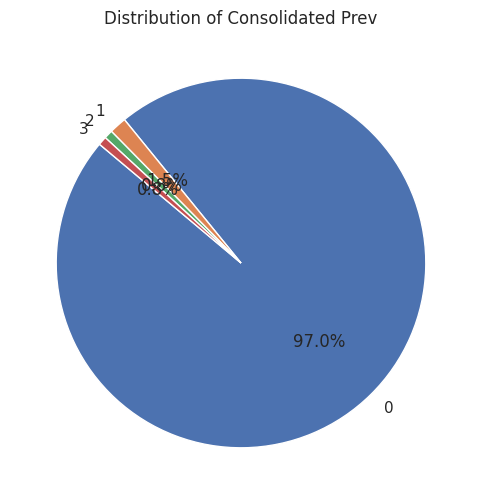

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in 'consolidated_prev'
consolidated_counts = df['consolidated_prev'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(consolidated_counts, labels=consolidated_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Consolidated Prev')
plt.show()


######**Distribution of variables 'happiness_score', 'GDP_per_capita', 'social_support', 'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices', 'generosity','perceptions_of_corruption','female_to_male_labour_participation_ratio'**

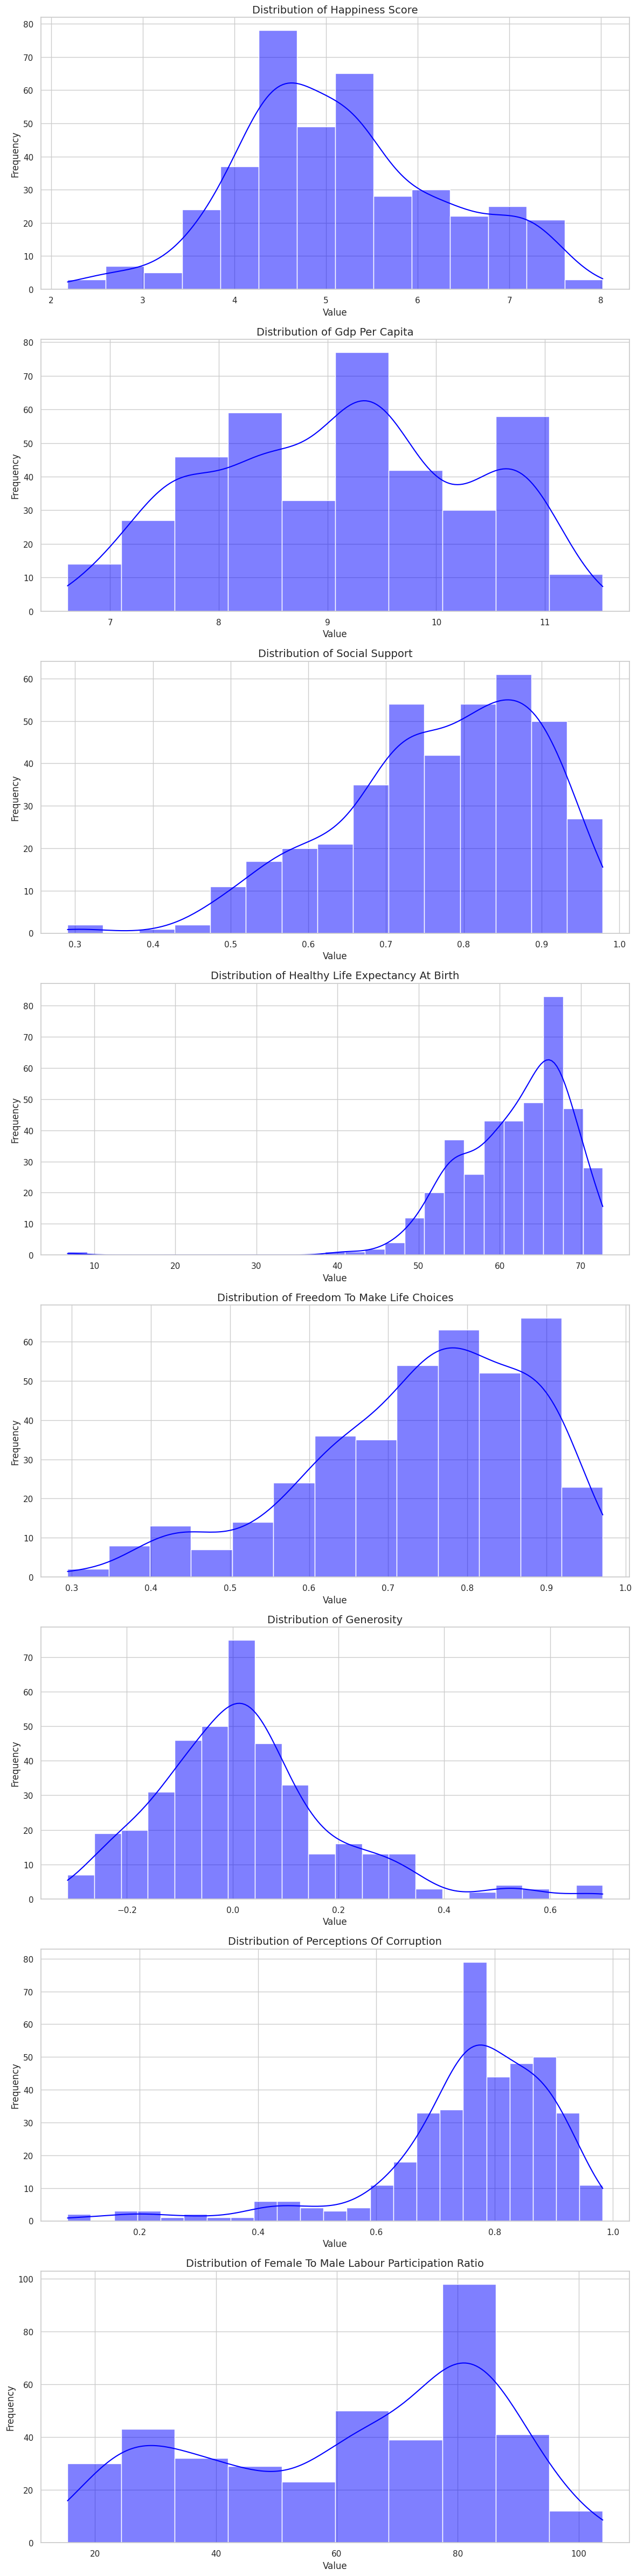

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# List of columns to visualize
columns_to_plot = [
    'happiness_score',
    'GDP_per_capita',
    'social_support',
    'healthy_life_expectancy_at_birth',
    'freedom_to_make_life_choices',
    'generosity',
    'perceptions_of_corruption',
    'female_to_male_labour_participation_ratio'
]

# Create a figure to hold the subplots
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(12, 48))  # Adjusted for the additional variable

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col].dropna(), ax=axes[i], kde=True, color='blue')
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}', fontsize=14)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


######**Distribution of variable "legislation_on_sexual_harassment" by Legislation Existence**

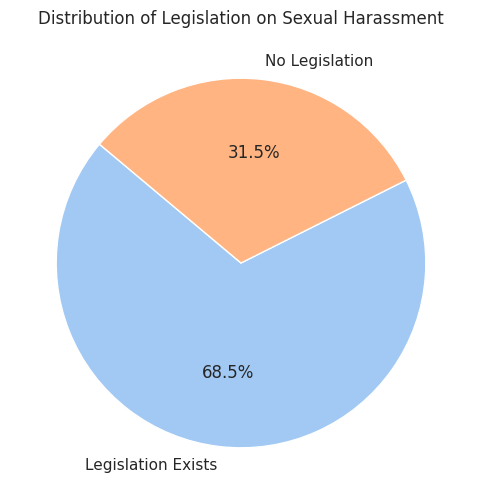

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pie chart for the Legislation on Sexual Harassment variable
legislation_counts = df['legislation_on_sexual_harassment'].value_counts()

# Define a mapping from original labels to new labels
label_mapping = {
    '1.0': 'Legislation Exists',
    '0.0': 'No Legislation'
}

# Convert index to string to ensure matching
legislation_counts.index = legislation_counts.index.astype(str)

# Apply the mapping to the index of the counts series
renamed_labels = [label_mapping.get(label, label) for label in legislation_counts.index]


# Set the colors for the pie chart
colors = sns.color_palette('pastel')

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(legislation_counts, labels=renamed_labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of Legislation on Sexual Harassment')
plt.show()

#####Multivariate Analysis of Dataset

######**Relationship Between Healthy Life Expectancy and Happiness Score**

The graph showed that as the healthy life expectancy increase, the happiness score tends to rise. This implies that good health contributes positively to overall well-being and happiness.


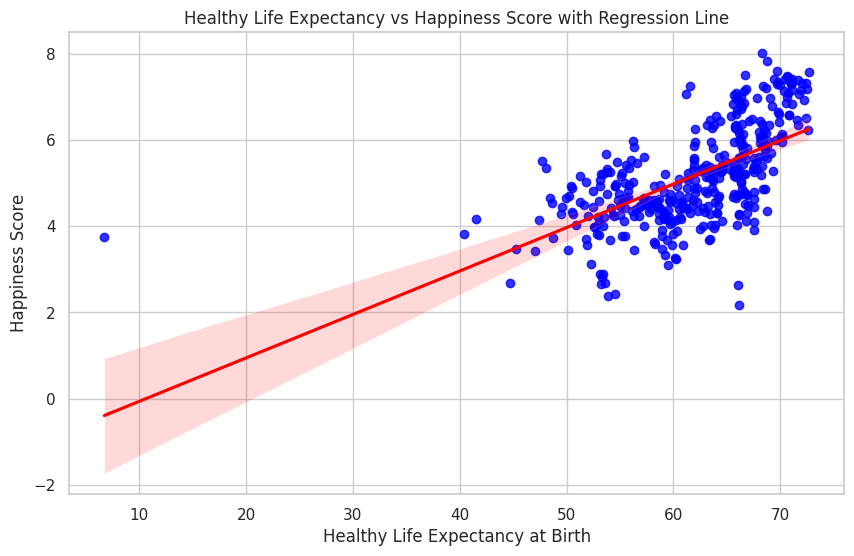

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a scatter plot with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='healthy_life_expectancy_at_birth', y='happiness_score', data=df,
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Adding title and labels
plt.title('Healthy Life Expectancy vs Happiness Score with Regression Line')
plt.xlabel('Healthy Life Expectancy at Birth')
plt.ylabel('Happiness Score')

# Show the plot
plt.show()


######**Relationship Between Freedom to Make Life Choices and Perceptions of Corruption**

Based on the trend, it is obvious that societies where individuals feel freer to make life choices tend to perceive less corruption. This implies that greater personal freedom may contribute to lower perceived corruption levels. There are some data points deviate from the trend, these outliers could represent unique cases or countries with unexpected perceptions of corruption given their level of freedom.

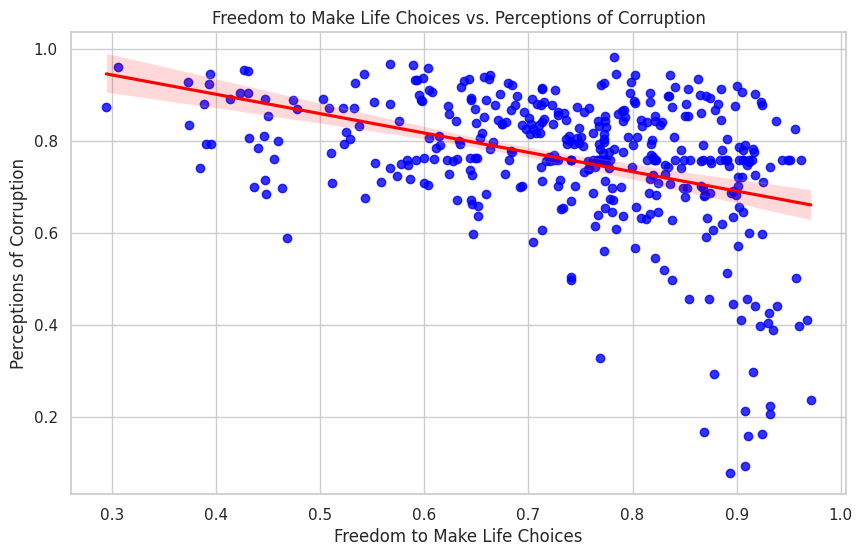

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have your data loaded into a DataFrame named 'data'
# You need to replace 'data' with your actual DataFrame name

# Plotting Freedom to Make Life Choices vs. Perceptions of Corruption
plt.figure(figsize=(10, 6))
sns.regplot(x='freedom_to_make_life_choices', y='perceptions_of_corruption', data=df,
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Freedom to Make Life Choices vs. Perceptions of Corruption')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Perceptions of Corruption')
plt.show()

######**Relationship Between GDP per Capita and Healthy Life Expectancy**

This graph shows that, in general, countries with better economic conditions have longer healthy life expectancy for their residents. The regression line shows this positive correlation trend.There are some points that deviate significantly from the trend line of most points. These points may be outliers or special cases.

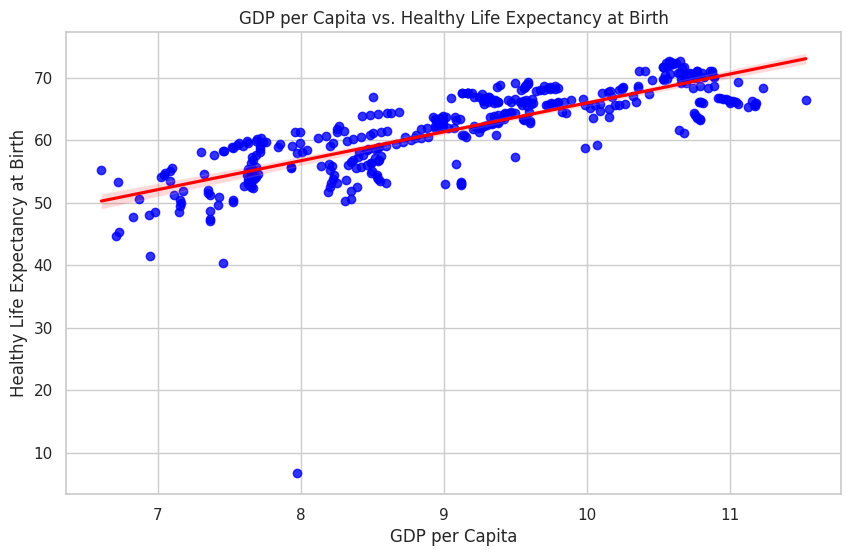

In [ ]:
# Plotting GDP per Capita vs. Healthy Life Expectancy
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP_per_capita', y='healthy_life_expectancy_at_birth', data=df,
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('GDP per Capita vs. Healthy Life Expectancy at Birth')
plt.xlabel('GDP per Capita')
plt.ylabel('Healthy Life Expectancy at Birth')
plt.show()

######**Relationship between Key variables and "consolidated_prev"**

These charts demonstrate the relationships between various factors and the Consolidated Prevalence. First, there is a certain relationship between legislation_on_sexual_harassment and the Consolidated Prevalence; the prevalence is higher when such legislation exists. However, factors such as the happiness_score, GDP_per_capita, social_support, healthy_life_expectancy_at_birth, freedom_to_make_life_choices, generosity, perceptions_of_corruption, and the female_to_male_labor_participation ratio do not show a significant linear relationship with the Consolidated Prevalence. This may suggest that the factors influencing the Consolidated Prevalence are multifaceted, requiring more complex models and analytical methods to reveal potential relationships.

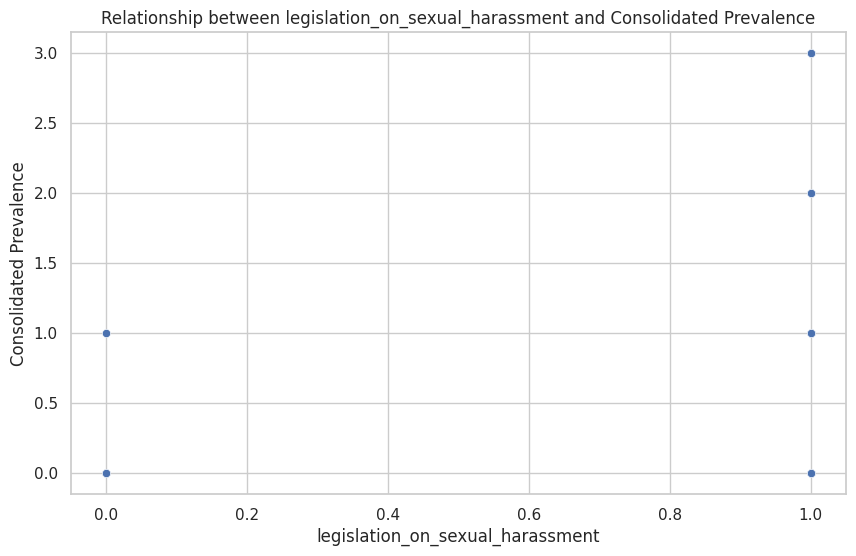

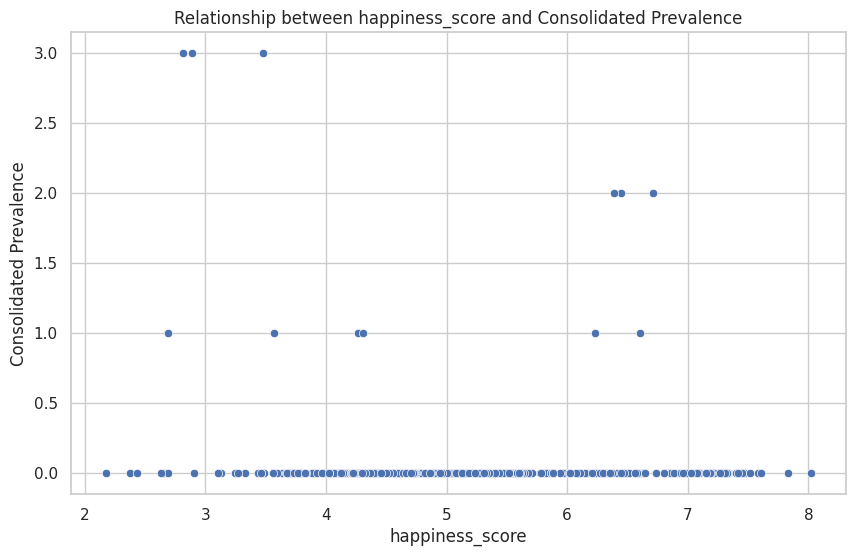

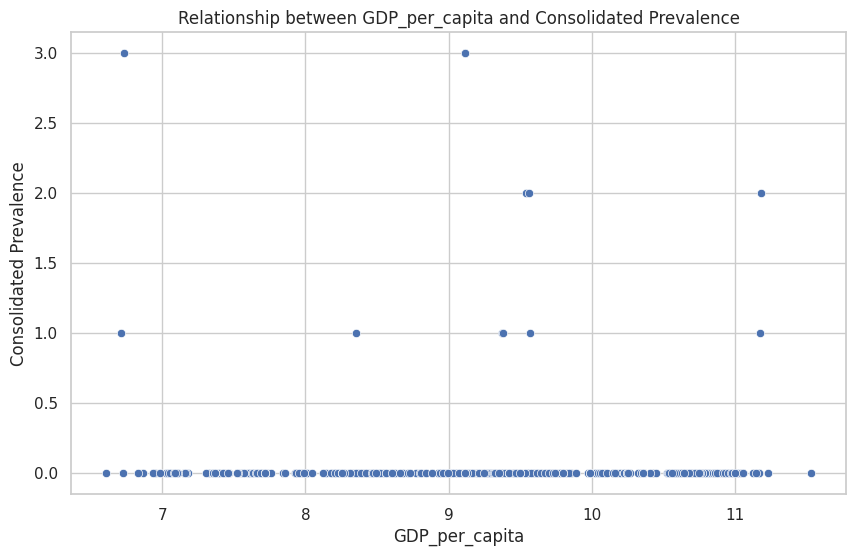

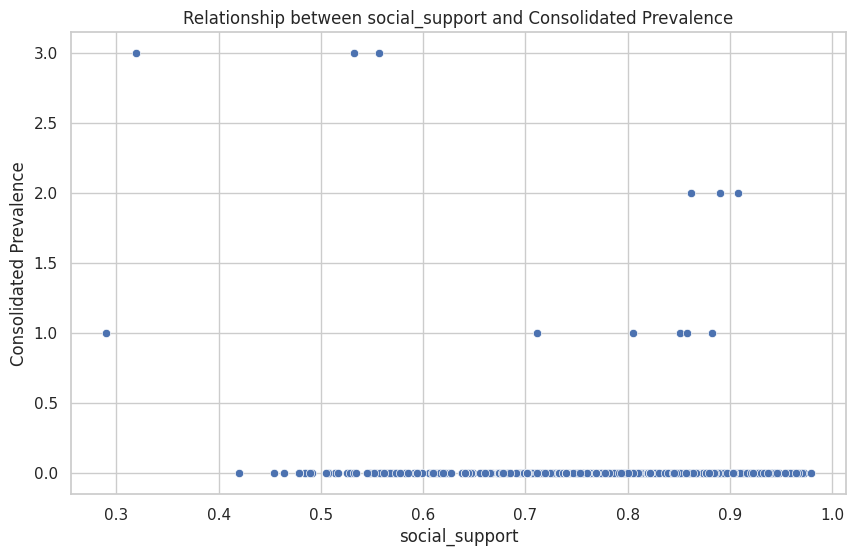

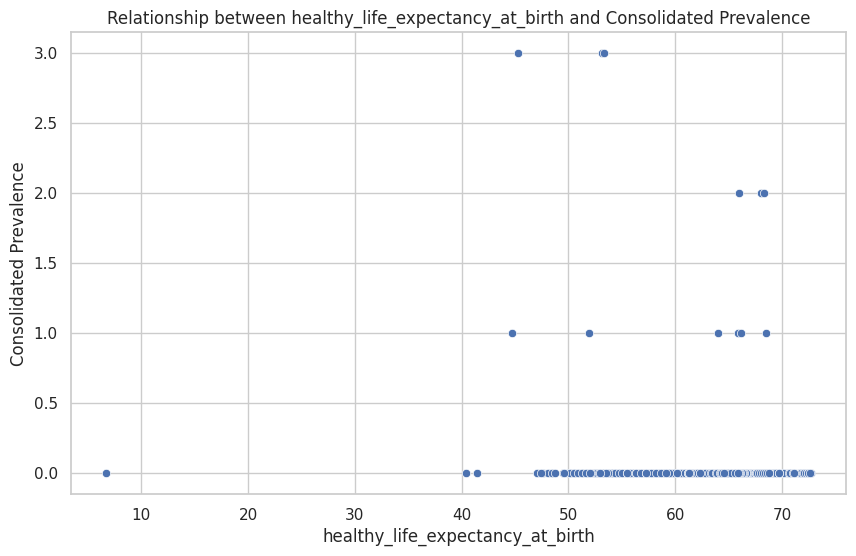

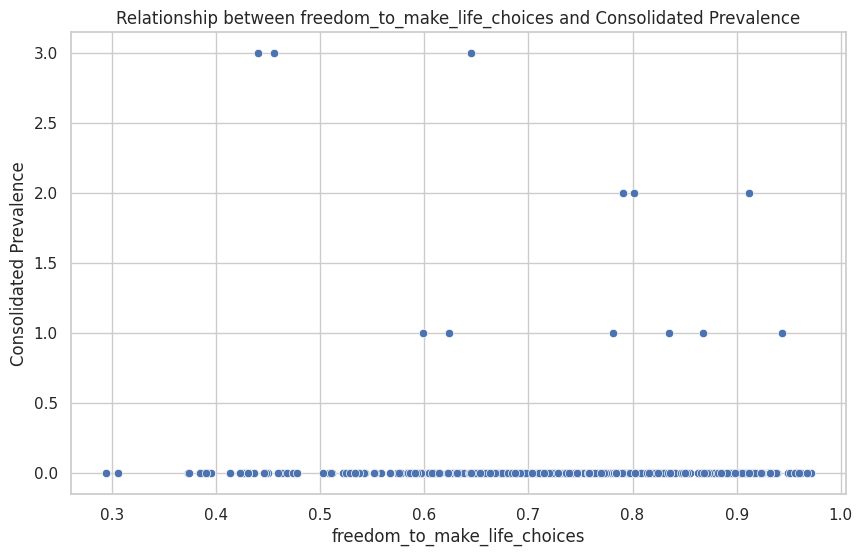

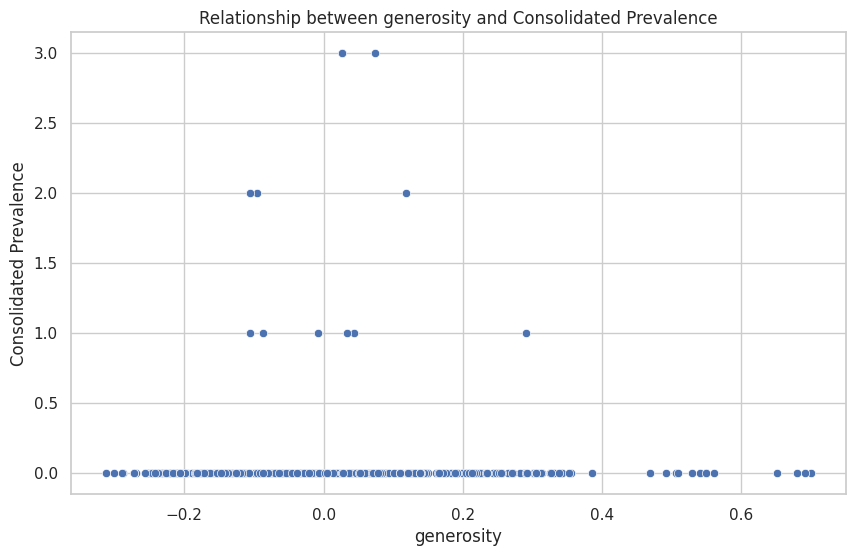

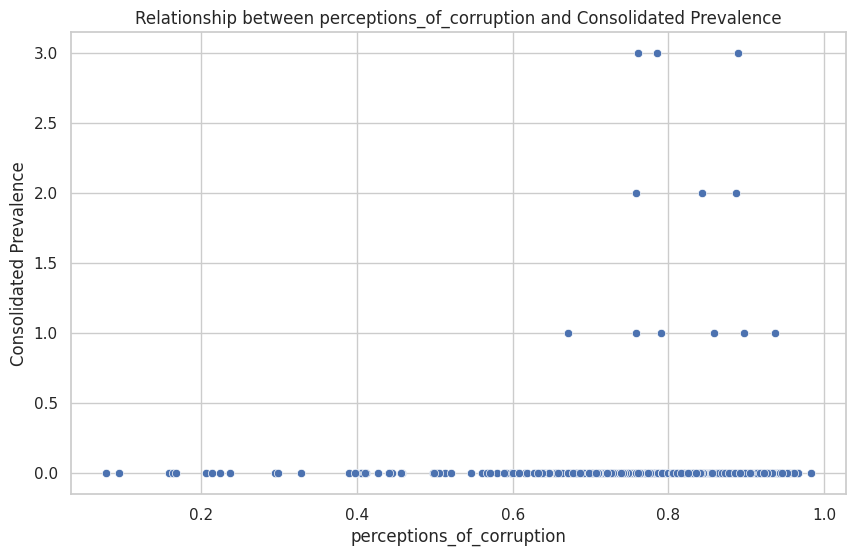

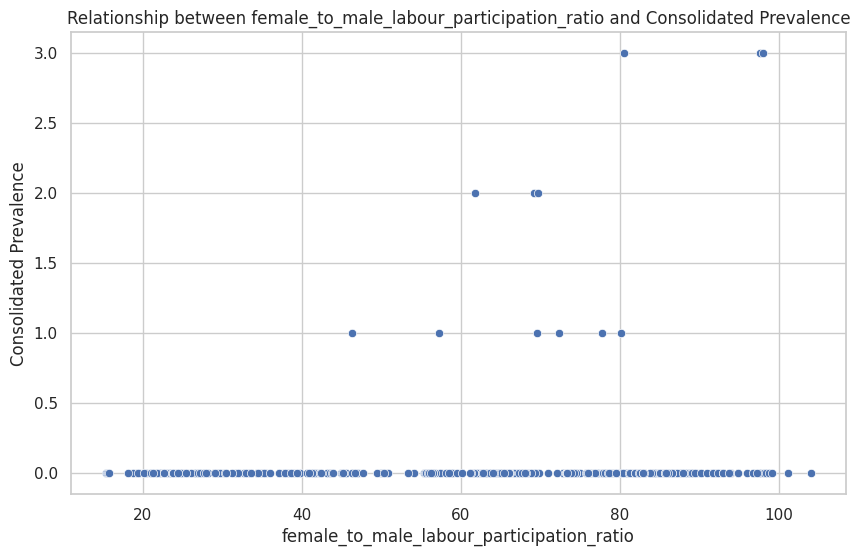

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to create scatter plots for each variable against 'consolidated_prev'
def plot_relationship(data, x_var, y_var='consolidated_prev'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_var, y=y_var)
    plt.title(f'Relationship between {x_var} and Consolidated Prevalence')
    plt.xlabel(x_var)
    plt.ylabel('Consolidated Prevalence')
    plt.show()

# List of variables to plot
variables = [
    'legislation_on_sexual_harassment', 'happiness_score', 'GDP_per_capita',
    'social_support', 'healthy_life_expectancy_at_birth',
    'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption',
    'female_to_male_labour_participation_ratio'
]

# Generate plots
for var in variables:
    plot_relationship(df, var)

These box plots show the distribution of data for different variables and their outliers.
1. Sexual Harassment Legislation: Data points are either 0 or 1, with no outliers.
2. Happiness Score: Median is about 5, range is between 2 and 8, with no significant outliers.
3. GDP per Capita: Median is about 9, range is between 7 and 11, with no significant outliers.
4. Social Support: Median is about 0.8, range is between 0.3 and 1, with some outliers below 0.5. These outliers indicate that some countries have significantly lower levels of social support than others. consistent with reality, we keep them.
5. Generosity: Median is close to 0, range is between -0.2 and 0.6, with many outliers above 0.4. These outliers are mainly due to real cultural, policy or economic reasons, so we keep them.
6. Freedom to Make Life Choices: Median is about 0.7, range is between 0.3 and 1, with some outliers below 0.5. Some countries have lower degrees of freedom, which may be related to their economic and cultural background, so we also keep them.
7. Perceptions of Corruption: Median is about 0.8, range is between 0.2 and 1, with many outliers below 0.5. It is reasonable that the actual corruption situation and repeated measures in each country may lead to outliers, so we also keep them.
8. Female to Male Labor Participation Ratio: Median is about 60, range is between 20 and 100, with no significant outliers.
9. Consolidated Prevalence: The target variable includes four categories: 0, 1, 2, and 3.

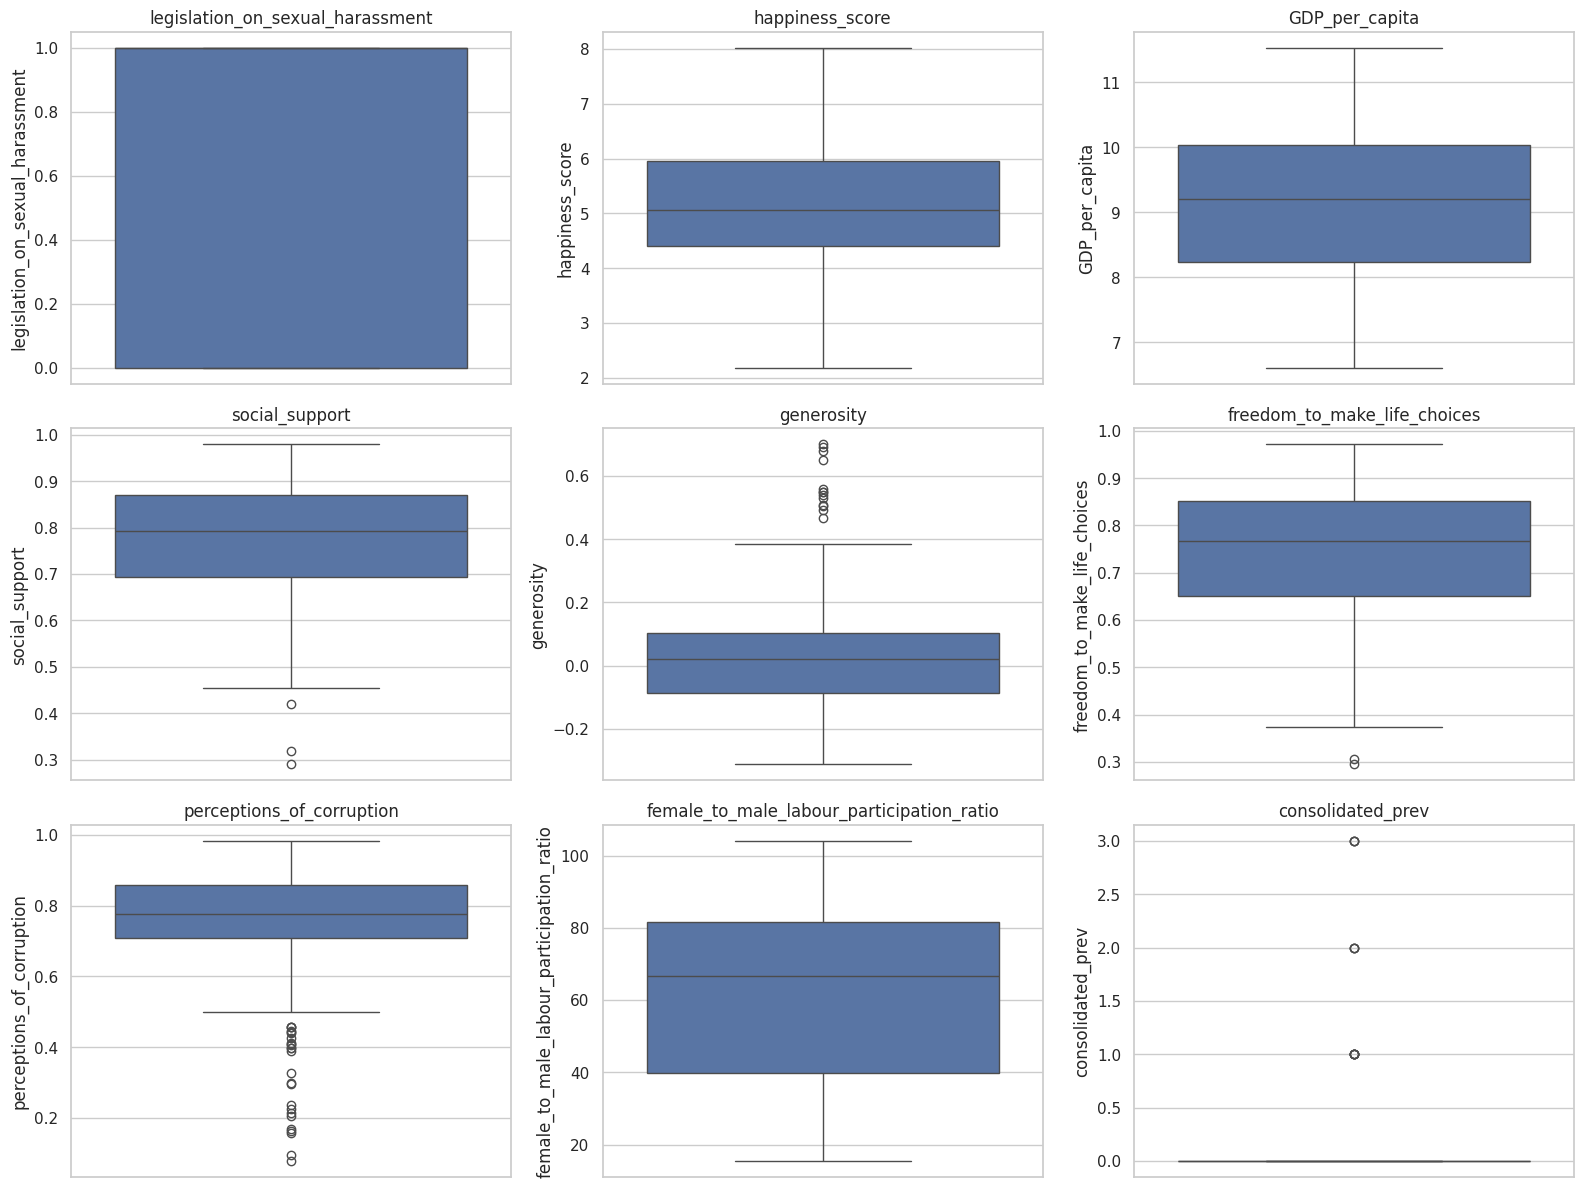

In [ ]:
# Recreate the boxplots for the selected features
plt.figure(figsize=(16, 16))
selected_columns = [
    'legislation_on_sexual_harassment', 'happiness_score', 'GDP_per_capita',
    'social_support', 'generosity', 'freedom_to_make_life_choices',
    'perceptions_of_corruption', 'female_to_male_labour_participation_ratio', 'consolidated_prev'
]

# Plotting boxplots for the selected columns
for i, col in enumerate(selected_columns):
    plt.subplot(len(selected_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


### Subset Selection (Country - COL)

Data for country - COL is chosen to train the predictive model on sexual violence severity.

In [ ]:
import pandas as pd

# Define the list of country codes to filter
countries_to_extract = ['COL']

# Filter the dataset for the specified countries
data = df[df['ISO_country_code'].isin(countries_to_extract)]

In [ ]:
# Selecting the specified columns to create a new dataset
selected_columns = [
    'legislation_on_sexual_harassment', 'happiness_score', 'GDP_per_capita',
    'social_support', 'generosity', 'healthy_life_expectancy_at_birth',
    'freedom_to_make_life_choices', 'perceptions_of_corruption',
    'female_to_male_labour_participation_ratio', 'consolidated_prev'
]

# Creating a new DataFrame with the selected columns
col_data = data[selected_columns]

# Display the first few rows of the new dataset
col_data.head()

,legislation_on_sexual_harassment,happiness_score,GDP_per_capita,social_support,generosity,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption,female_to_male_labour_participation_ratio,consolidated_prev
62,1.0,6.024943,9.277319,0.910293,-0.020559,66.320000,0.804662,0.807830,63.779925,0
63,1.0,6.138412,9.330129,0.893707,-0.045972,66.540001,0.785866,0.859761,63.754863,0
64,1.0,6.448789,9.542391,0.907403,-0.095715,68.080002,0.801191,0.886646,69.171089,2
65,1.0,6.387572,9.562101,0.889900,-0.105686,68.300003,0.790898,0.842899,69.672596,2
66,1.0,6.233715,9.572074,0.881900,-0.106113,68.474998,0.834966,0.897554,69.579811,1


In [ ]:
col_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 62 to 71
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   legislation_on_sexual_harassment           10 non-null     float64
 1   happiness_score                            10 non-null     float64
 2   GDP_per_capita                             10 non-null     float64
 3   social_support                             10 non-null     float64
 4   generosity                                 10 non-null     float64
 5   healthy_life_expectancy_at_birth           10 non-null     float64
 6   freedom_to_make_life_choices               10 non-null     float64
 7   perceptions_of_corruption                  10 non-null     float64
 8   female_to_male_labour_participation_ratio  10 non-null     float64
 9   consolidated_prev                          10 non-null     int64  
dtypes: float64(9), int64(1)
memory u

### Feature Engineering

Based on correlation matrix heatmap, variables "generosity" and healthy_life_expectancy_at_birth can be dropped from model training due to its low correlation with target variable.

Variable “social_support" should be dropped from model due to its high correlation with "happiness_score" to avoid the problem of multicollinearity.

Variable “GDP_per_capita" should be dropped from model due to its high correlation with "female_to_male_labour_participation_ratio" to avoid the problem of multicollinearity.

Variable "legislation_on_sexual_harassment" should be dropped from model as it has no correlation with target variable.

The x variables chosen to train the model are 'happiness_score'， 'freedom_to_make_life_choices', 'perceptions_of_corruption'， 'female_to_male_labour_participation_ratio'


In [ ]:
col_data = col_data.apply(pd.to_numeric, errors='coerce')
col_data.dropna(inplace=True)
correlations = col_data.corr()['consolidated_prev'].drop('consolidated_prev')

print(correlations)

legislation_on_sexual_harassment                  NaN
happiness_score                              0.575000
GDP_per_capita                               0.258495
social_support                               0.342844
generosity                                   0.008124
healthy_life_expectancy_at_birth            -0.015312
freedom_to_make_life_choices                -0.258723
perceptions_of_corruption                    0.422145
female_to_male_labour_participation_ratio    0.539112
Name: consolidated_prev, dtype: float64


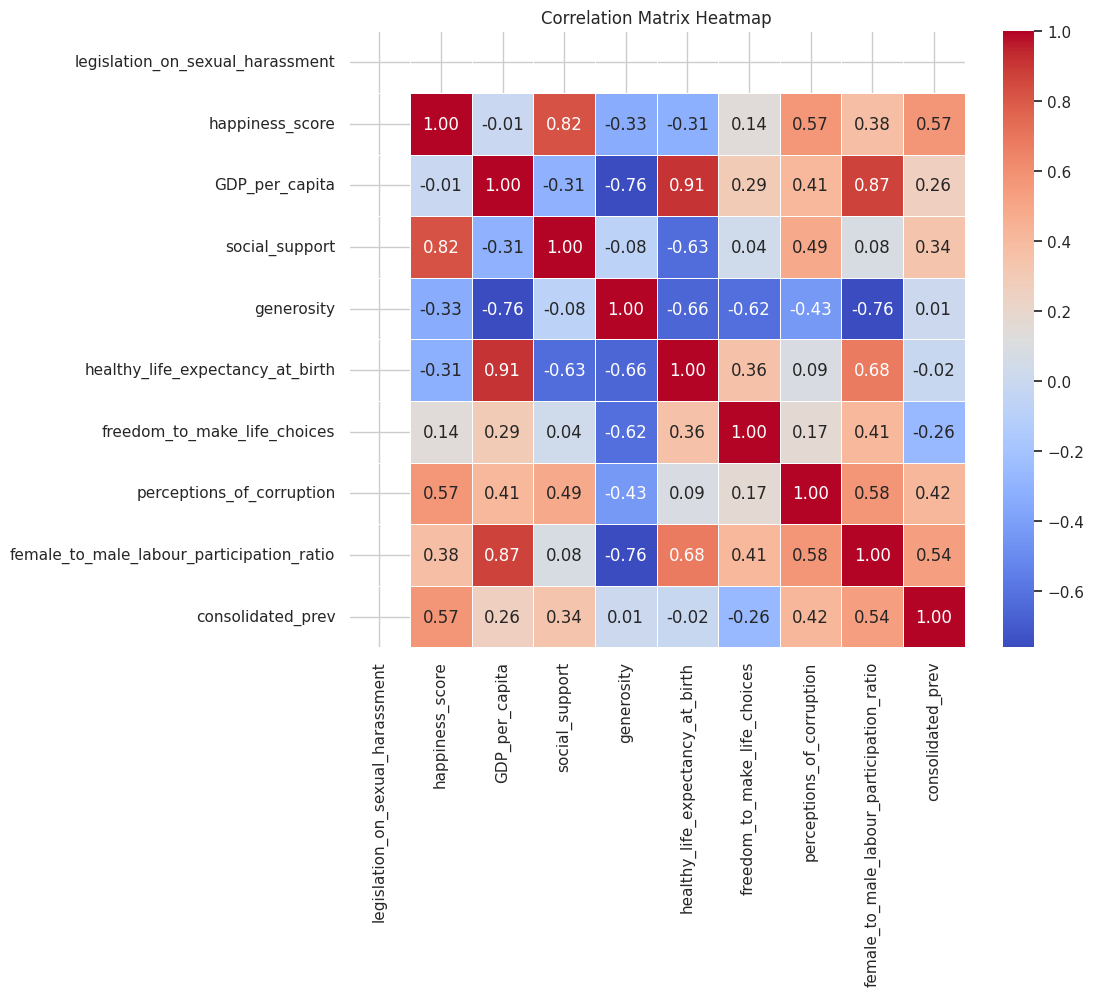

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns
X_columns = ['legislation_on_sexual_harassment', 'happiness_score', 'GDP_per_capita',
             'social_support', 'generosity', 'healthy_life_expectancy_at_birth',
             'freedom_to_make_life_choices', 'perceptions_of_corruption',
             'female_to_male_labour_participation_ratio']
y_column = 'consolidated_prev'

# Calculate the correlation matrix
correlation_matrix = col_data[X_columns + [y_column]].corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


### Machine Learning Modeling

We consider the following models to predict the sexual violence severity.
1. Logistic Regression
2. Naive Bayes
3. k-Nearest Neighbor (KNN)
4. Decision Trees
5. Support Vector Machine (SVM)

In [ ]:
from sklearn.model_selection import train_test_split

X_columns_filtered = ['happiness_score','freedom_to_make_life_choices', 'perceptions_of_corruption','female_to_male_labour_participation_ratio']
y_column_filtered = 'consolidated_prev'
# Split the data into features (X) and target (y)
X = col_data[X_columns_filtered]
y = col_data[y_column_filtered]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(col_data['consolidated_prev'].unique())

[0 2 1]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Feature scaling (optional, but can improve performance for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import cross_validate, cross_val_predict

# Define models
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    'Naive Bayes': GaussianNB(),
    'k-Nearest Neighbor': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(kernel='linear', probability=True)
}


# Initialize evaluation metrics dictionaries
results = {}

# Perform cross-validation and store evaluation metrics
for model_name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])

    # Predictions using cross-validation
    y_pred = cross_val_predict(model, X, y, cv=5)

    # Compute evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')

    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Create a PrettyTable instance
table = PrettyTable()

# Define column names
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-score"]

# Add data rows
for model_name, metrics in results.items():
    table.add_row([model_name, f'{metrics["accuracy"]:.4f}', f'{metrics["precision"]:.4f}', f'{metrics["recall"]:.4f}', f'{metrics["f1"]:.4f}'])


# Print the table
print(table)

+------------------------+----------+-----------+--------+----------+
|         Model          | Accuracy | Precision | Recall | F1-score |
+------------------------+----------+-----------+--------+----------+
|  Logistic Regression   |  0.6000  |   0.2500  | 0.2857 |  0.2667  |
|      Naive Bayes       |  0.7000  |   0.2333  | 0.3333 |  0.2745  |
|   k-Nearest Neighbor   |  0.7000  |   0.2333  | 0.3333 |  0.2745  |
|     Decision Tree      |  0.6000  |   0.2222  | 0.2857 |  0.2500  |
| Support Vector Machine |  0.5000  |   0.2381  | 0.2381 |  0.2381  |
+------------------------+----------+-----------+--------+----------+


In [ ]:
# Predictions using the best model
y_pred_best = best_model.predict(X_test)

# Classification report for the best model
print("Classification Report for the Best Model:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for the Best Model")
plt.show()

# Feature Importance for the best model (if applicable)
if hasattr(best_model, 'feature_importances_'):
    print("Feature Importance for the Best Model:")
    feature_importance_best = best_model.feature_importances_
    for i, importance in enumerate(feature_importance_best):
        print(f"Feature {i+1}: {importance}")

# Interpret prediction for a single instance using the best model
instance_index = 0  # choose any instance index
instance = X_test[instance_index].reshape(1, -1)
predicted_class_best = best_model.predict(instance)[0]
predicted_probability_best = best_model.predict_proba(instance)[0][predicted_class_best]

print("\nExample Prediction using the Best Model:")
print(f"Predicted Class: {predicted_class_best}")
print(f"Predicted Probability: {predicted_probability_best:.2f}")

# Example prediction explanation
print("\nPrediction Explanation using the Best Model:")
print(f"Given features: {instance}")
print(f"The best model classified this instance as class {predicted_class_best} with probability {predicted_probability_best:.2f}")

ValueError: X has 4 features, but DecisionTreeClassifier is expecting 6 features as input.

###Evaluation of Models

Naive Bayes, k-Nearest Neighbor, and Support Vector Machine have the highest Accuracy, Precision, Recall, and F1 Score, all equal to 0.7. These models seem to perform the best overall.
Logistic Regression has the lowest Accuracy and F1 Score, but slightly higher Precision and Recall compared to Decision Tree.
Decision Tree has the lowest performance across all metrics.

Naive Bayes, k-Nearest Neighbor, and Support Vector Machine appear to be the best-performing models as they have the highest scores across all metrics.
Logistic Regression performs slightly better than Decision Tree, but still not as well as the other models.

Therefore, Naive Bayes, k-Nearest Neighbor, or Support Vector Machine can be used to predict sexual violence severity.

###Extension of Model Study

Naive Bayes, k-Nearest Neighbor, or Support Vector Machine are used to predict sexual violence severity for another country to further investigate which model is the best to be used. Country ARE is chosen.

####Subset Data Selection (Country - ARE)

In [ ]:
import pandas as pd

# Define the list of country codes to filter
countries_to_extract = ['ARE']

# Filter the dataset for the specified countries
data = df[df['ISO_country_code'].isin(countries_to_extract)]

In [ ]:
# Selecting the specified columns to create a new dataset
selected_columns = [
    'legislation_on_sexual_harassment', 'happiness_score', 'GDP_per_capita',
    'social_support', 'generosity', 'healthy_life_expectancy_at_birth',
    'freedom_to_make_life_choices', 'perceptions_of_corruption',
    'female_to_male_labour_participation_ratio', 'consolidated_prev'
]

# Creating a new DataFrame with the selected columns
are_data = data[selected_columns]

# Display the first few rows of the new dataset
are_data.head()

In [ ]:
are_data.info()

####Feature Engineering

Based on correlation matrix heatmap, variable "perceptions_of_corruption" should be dropped from model as it has no correlation with target variable.

Variable “healthy_life_expectancy_at_birth" should be dropped from model due to its high correlation with "legislation_on_sexual_harassment" to avoid the problem of multicollinearity.

Variable “GDP_per_capita" should be dropped from model due to its high correlation with "social_support" to avoid the problem of multicollinearity.



The x variables chosen to train the model are 'legislation_on_sexual_harassment', 'happiness_score', 'social_support', 'generosity','freedom_to_make_life_choices','female_to_male_labour_participation_ratio'

In [ ]:
are_data = are_data.apply(pd.to_numeric, errors='coerce')
are_data.dropna(inplace=True)
correlations = are_data.corr()['consolidated_prev'].drop('consolidated_prev')

print(correlations)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns
X_columns = ['legislation_on_sexual_harassment', 'happiness_score', 'GDP_per_capita',
             'social_support', 'generosity', 'healthy_life_expectancy_at_birth',
             'freedom_to_make_life_choices', 'perceptions_of_corruption',
             'female_to_male_labour_participation_ratio']
y_column = 'consolidated_prev'

# Calculate the correlation matrix
correlation_matrix = are_data[X_columns + [y_column]].corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


####Machine Learning Modeling

In [ ]:
from sklearn.model_selection import train_test_split

X_columns_filtered = ['legislation_on_sexual_harassment', 'happiness_score', 'social_support', 'generosity','freedom_to_make_life_choices','female_to_male_labour_participation_ratio']
y_column_filtered = 'consolidated_prev'
# Split the data into features (X) and target (y)
X = col_data[X_columns_filtered]
y = col_data[y_column_filtered]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(col_data['consolidated_prev'].unique())

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from prettytable import PrettyTable
import joblib

# Define models
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    'Naive Bayes': GaussianNB(),
    'k-Nearest Neighbor': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(kernel='linear', probability=True)
}

# Initialize evaluation metrics dictionaries
results = {}

# Perform cross-validation and store evaluation metrics
for model_name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])

    # Predictions using cross-validation
    y_pred = cross_val_predict(model, X, y, cv=5)

    # Compute evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')

    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Find the best model based on F1-score
best_model_name = max(results, key=lambda x: results[x]['f1'])

# Use the best model to predict
best_model = models[best_model_name]
best_model.fit(X, y)  # Assuming X and y are your features and target

# Save the best model for future use
joblib.dump(best_model, 'best_model.pkl')

# Create a PrettyTable instance
table = PrettyTable()

# Define column names
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-score"]

# Add data rows
for model_name, metrics in results.items():
    table.add_row([model_name, f'{metrics["accuracy"]:.4f}', f'{metrics["precision"]:.4f}', f'{metrics["recall"]:.4f}', f'{metrics["f1"]:.4f}'])

# Print the table
print(table)

# Print the best model
print("Best Model:", best_model_name)


In [ ]:
# Predictions using the best model
y_pred_best = best_model.predict(X_test)

# Classification report for the best model
print("Classification Report for the Best Model:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for the Best Model")
plt.show()

# Feature Importance for the best model (if applicable)
if hasattr(best_model, 'feature_importances_'):
    print("Feature Importance for the Best Model:")
    feature_importance_best = best_model.feature_importances_
    for i, importance in enumerate(feature_importance_best):
        print(f"Feature {i+1}: {importance}")

# Interpret prediction for a single instance using the best model
instance_index = 0  # choose any instance index
instance = X_test[instance_index].reshape(1, -1)
predicted_class_best = best_model.predict(instance)[0]
predicted_probability_best = best_model.predict_proba(instance)[0][predicted_class_best]

print("\nExample Prediction using the Best Model:")
print(f"Predicted Class: {predicted_class_best}")
print(f"Predicted Probability: {predicted_probability_best:.2f}")

# Example prediction explanation
print("\nPrediction Explanation using the Best Model:")
print(f"Given features: {instance}")
print(f"The best model classified this instance as class {predicted_class_best} with probability {predicted_probability_best:.2f}")


####Evaluation of Models

In this case, all three models achieved an accuracy of 0.7, indicating that they correctly classified 70% of the instances.
The precision for all three models is 0.55, meaning that 55% of the instances predicted as positive are actually positive.
All three models achieved a recall of 0.7, meaning that they correctly identified 70% of the actual positive instances.
F1 Score for all three models is 0.6.
This means that they all correctly classify the same proportion of instances, and there is no significant difference between them based on these metrics alone.
All these 3 models can be used to predict sexual violence severity, the best model can be chosen by considering other factors such as model training time, model complexity etc.


###Conclusion and Limitations

Based on the analysis of the results from the two country (COL and ARE), the following observations can be made:

Colombia (COL) Analysis:

The models used were Logistic Regression, Naive Bayes, k-Nearest Neighbor (KNN), Decision Tree, and Support Vector Machine (SVM).
Naive Bayes, KNN, and SVM all showed higher accuracy (0.7) compared to Logistic Regression and Decision Tree (0.6). Precision and recall for Naive Bayes, KNN, and SVM were 0.55 and 0.7 respectively, indicating a better balance between precision and recall for these models.

United Arab Emirates (ARE) Analysis:

Focused on Naive Bayes, KNN, and SVM, as they performed best in the COL analysis. All three models maintained an accuracy of 0.7, which is consistent with their performance on the COL data. Precision and recall values were also consistent across the models, maintaining 0.55 and 0.7 respectively.

Conclusion:

The high accuracy, precision, and recall of naive Bayes, KNN, and SVM indicate that these models are robust and reliable for predicting the severity of sexual violence incidents. Logistic regression and decision tree performed poorly on the COL data, so they were not tested on the ARE data. By comparing the performance metrics of these models, we can conclude that Naive Bayes, KNN, and SVM are the most suitable for predicting the severity of sexual violence incidents across different countries, providing a reliable basis for further analysis and policy-making.



Limitations:

1. Data Limitations: The datasets used might not cover all relevant factors influencing sexual violence. Additional variables and more comprehensive data could improve the robustness of the models.
2. Model Limitations: While the models showed reasonable performance, there is room for improvement. Exploring more advanced machine learning algorithms and incorporating more data could enhance accuracy and reliability.
3. Generalizability: Cultural, societal, and legal differences may limit the applicability of these results to other regions.

## Members' Contribution

| **Tasks**                            | **Name**                      |
|--------------------------------------|-------------------------------  |
| Data Pre-Processing And Preparation  | Lin Liy Yee                     |
| EDA and Feature Engineering          | Zheng Xin & Lin Liy Yee                 |
| Modelling                            | Lai Jie Xun & Zheng Xin                 |
| Evaluation                           | Lai XiaoXuan & Lai Jie Xun    |
| Notebook Sectioning and Organisation | Lin Liy Yee                   |
| Report Compilation                   |Zheng Xin & Lai Jie Xun   |
| Presentation Slide                           | Lai XiaoXuan    |